In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm


In [101]:
color_number_le = 0  # Variable, incremented for each series.
color_number_al = 0 
color_number_res = 0

def restart_colors():
    global color_number_le, color_number_al, color_number_res
    color_number_le = 0
    color_number_al = 0 
    color_number_res = 0 

def next_color(cmap, color_number):
    #color = tuple(np.random.uniform(0.0, 0.5, 3))
    #print(color_number ,0.1 * color_number)
    color = cmap((0.15 * color_number)%1)
    return [color[0],color[1],color[2],color[3]]

def get_shape(key, title):
    global color_number_le, color_number_al, color_number_res
    if (key in "AlexNet") or ("AlexNet" in key) or (title in "AlexNet") or ("AlexNet" in title):
        color = next_color(cm.get_cmap('tab10'), color_number_al)
        color_number_al += 1 
        return 'd-', color
    elif  (key in "ResNet") or ("ResNet" in key) or (title in "ResNet") or ("ResNet" in title) :
        color = next_color(cm.get_cmap('Dark2'), color_number_res)
        color_number_res += 1 
        return 'o-', color
    elif (key in "LeNet") or ("LeNet" in key) or (title in "LeNet") or ("LeNet" in title) :
        color = next_color(cm.get_cmap('gist_rainbow'), color_number_le)
        color_number_le += 1
        return 'v-', color
    else:
        print("went to else for some reason")
        
def get_color(key, title):
    global color_number_le, color_number_al, color_number_res
    if (key in "BSP") or ("BSP" in key) :
        color = next_color(cm.get_cmap('tab10'), 0)
        #color_number_al += 1 
        return color
    elif  (key in "FedAvg") or ("FedAvg" in key):
        color = next_color(cm.get_cmap('Dark2'), 0)
        #color_number_res += 1 
        return color
    elif  (key in "FedProx") or ("FedProx" in key):
        color = next_color(cm.get_cmap('gist_rainbow'), 0)
        #color_number_le += 1
        return color
    elif  (key in "Centralised") or ("Centralised" in key):
        color = next_color(cm.get_cmap('jet'), 0)
        return color
    else:
        print("went to else for some reason")

def plot_curves(acclist, subplot, title, botlim = 0, toplim = 1, ylabel="Accuracy", color_by_algo=False, legend_size=14, linewidth=2):
    subplot.set_xlabel('Round', fontsize=14)
    subplot.text(.5,.01, title, horizontalalignment='center', verticalalignment='bottom', fontsize=20, transform=subplot.transAxes)
    subplot.set_ylabel(ylabel, fontsize=14)
    subplot.set_ylim(bottom=botlim,top= toplim)
    
    
    for al in acclist:
        modshape, colmap = get_shape(str(al), title)
        if color_by_algo:
            colmap = get_color(str(al), title)
        eporange = np.arange(len(list(acclist[al]))+1)
        thelist = np.insert(acclist[al],0,0)
        subplot.plot(eporange, thelist , modshape, color = colmap ,label=str(al), alpha=0.6,linewidth=linewidth)
    subplot.legend(loc='lower right',fontsize=legend_size)


In [42]:
def bar_plot_acc(labels, cen, fl1, fl2):
    x = np.arange(len(labels))  # the label locations
    width = 0.25 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='centralized')
    rects2 = ax.bar(x , fl1, width, label='FedAvg with 3 clients and 20% skewness')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg with 3 clients and 40% skewness')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy %',fontsize=14)
    ax.set_title('accuracy accross models',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)

    ax.legend()
    
    plt.ylim(bottom=.6)
    
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:0.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel(rects1)
    def autolabel2(rectcent, rects):
        for reo, rect in zip(rectcent, rects):
            height_dif = reo.get_height() - rect.get_height()
            height = rect.get_height()
            ax.annotate('- {:0.2f}%'.format(height_dif),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    autolabel2(rects1, rects2)
    autolabel2(rects1, rects3)

    _=plt.show()


#cen = [list(acc_dic.values())[0][24]*100,list(acc_dic2.values())[0][24]*100,list(acc_dic3.values())[0][24]*100] 
#fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100] 
#fl2 = [list(acc_dic.values())[2][24]*100,list(acc_dic2.values())[2][24]*100,list(acc_dic3.values())[2][24]*100]
labels = ['ResNet34', 'Alexnet', 'LeNet']
    
#bar_plot_acc(labels, cen, fl1, fl2)    



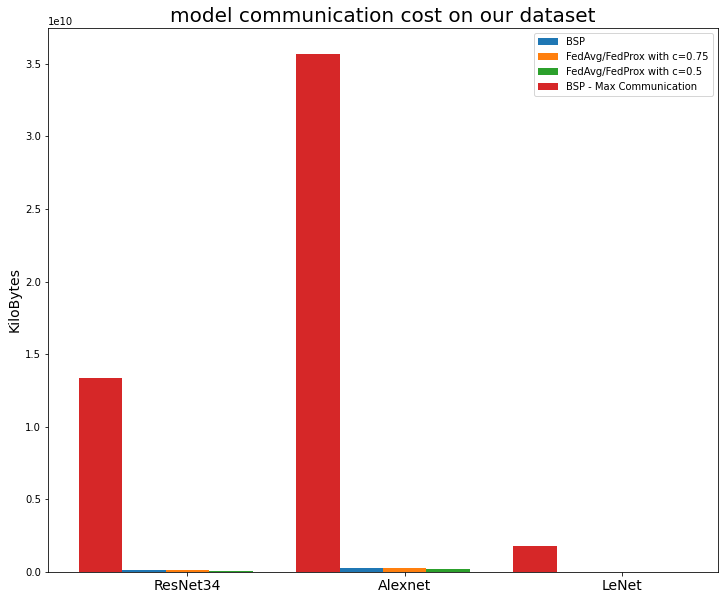

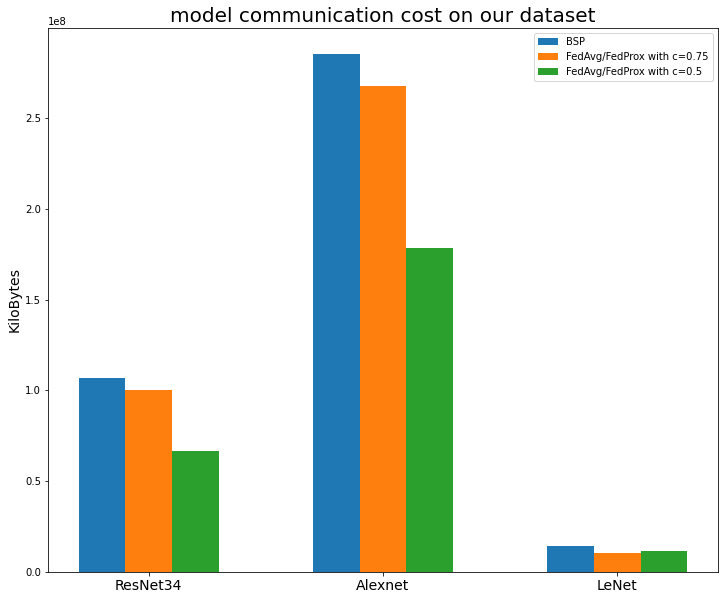

In [126]:
def bar_plot_comumication(labels, cen, fl1, fl2, bsp_ideal=None):
    x = np.arange(len(labels))  # the label locations
    width = 0.2 
    #plt.figure(figsize=(10, 8))

    fig, ax = plt.subplots(figsize=(12, 10))
    rects1 = ax.bar(x - width, cen, width, label='BSP')
    rects2 = ax.bar(x , fl1, width, label='FedAvg/FedProx with c=0.75')
    rects3 = ax.bar(x + width, fl2, width, label='FedAvg/FedProx with c=0.5')
    if bsp_ideal:
        rects1 = ax.bar(x - 2* width, bsp_ideal, width, label='BSP - Max Communication')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('KiloBytes',fontsize=14)
    ax.set_title('model communication cost on our dataset',fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=14)
    #ax.set_ylim()
    ax.legend()
    
    #plt.ylim(top=.5e9)
    
    

    _=plt.show()


ep = 1
cln = 8
btchnr = 1000
bsp_ideal = [83332*btchnr*2*80,222954*btchnr*2*80,17587*btchnr*2*50]
bsp = [83332*cln*2*80,222954*2*cln*80,17587*2*cln*50]
#fl1 = [list(acc_dic.values())[1][24]*100,list(acc_dic2.values())[1][24]*100,list(acc_dic3.values())[1][24]*100]
frackl = 6
fl2 = [83332*frackl*ep*2*100,222954*frackl*ep*2*100,17587*frackl*ep*2*50]
frackl = 4
fl1 = [83332*frackl*ep*2*100,222954*frackl*ep*2*100,17587*frackl*ep*2*80]

labels = ['ResNet34', 'Alexnet', 'LeNet']
    
bar_plot_comumication(labels, bsp, fl2, fl1, bsp_ideal=bsp_ideal) 
bar_plot_comumication(labels, bsp, fl2, fl1)   

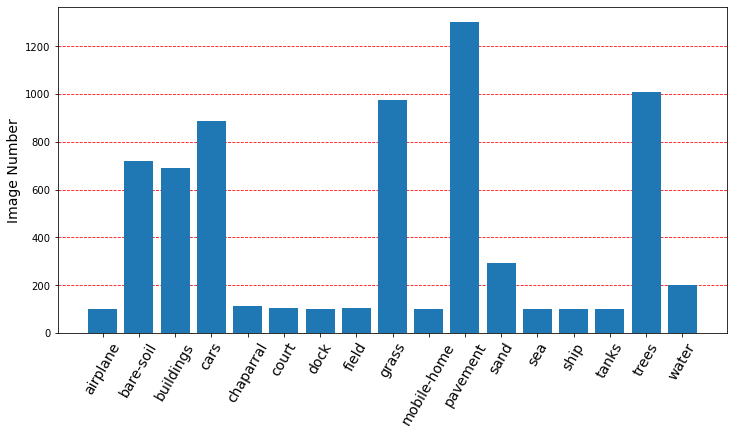

In [23]:
import pandas as pd

df = pd.read_excel ('./multilabels/LandUse_Multilabeled.xlsx')
df_label = np.array(df)
image_perlabel = np.sum(df_label[:, 1:], axis=0)
class_names = np.array(["airplane", "bare-soil", "buildings", "cars", "chaparral", "court", "dock",
                        "field", "grass", "mobile-home", "pavement", "sand", "sea", "ship", "tanks", "trees", "water"])
x = np.arange(17)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_axisbelow(True)
ax.grid(axis='y',color='red', linestyle='dashed')

plt.bar(x, image_perlabel)
ax.set_ylabel('Image Number',fontsize=14)
plt.xticks(x, class_names, rotation=60, fontsize = 14)
plt.show()

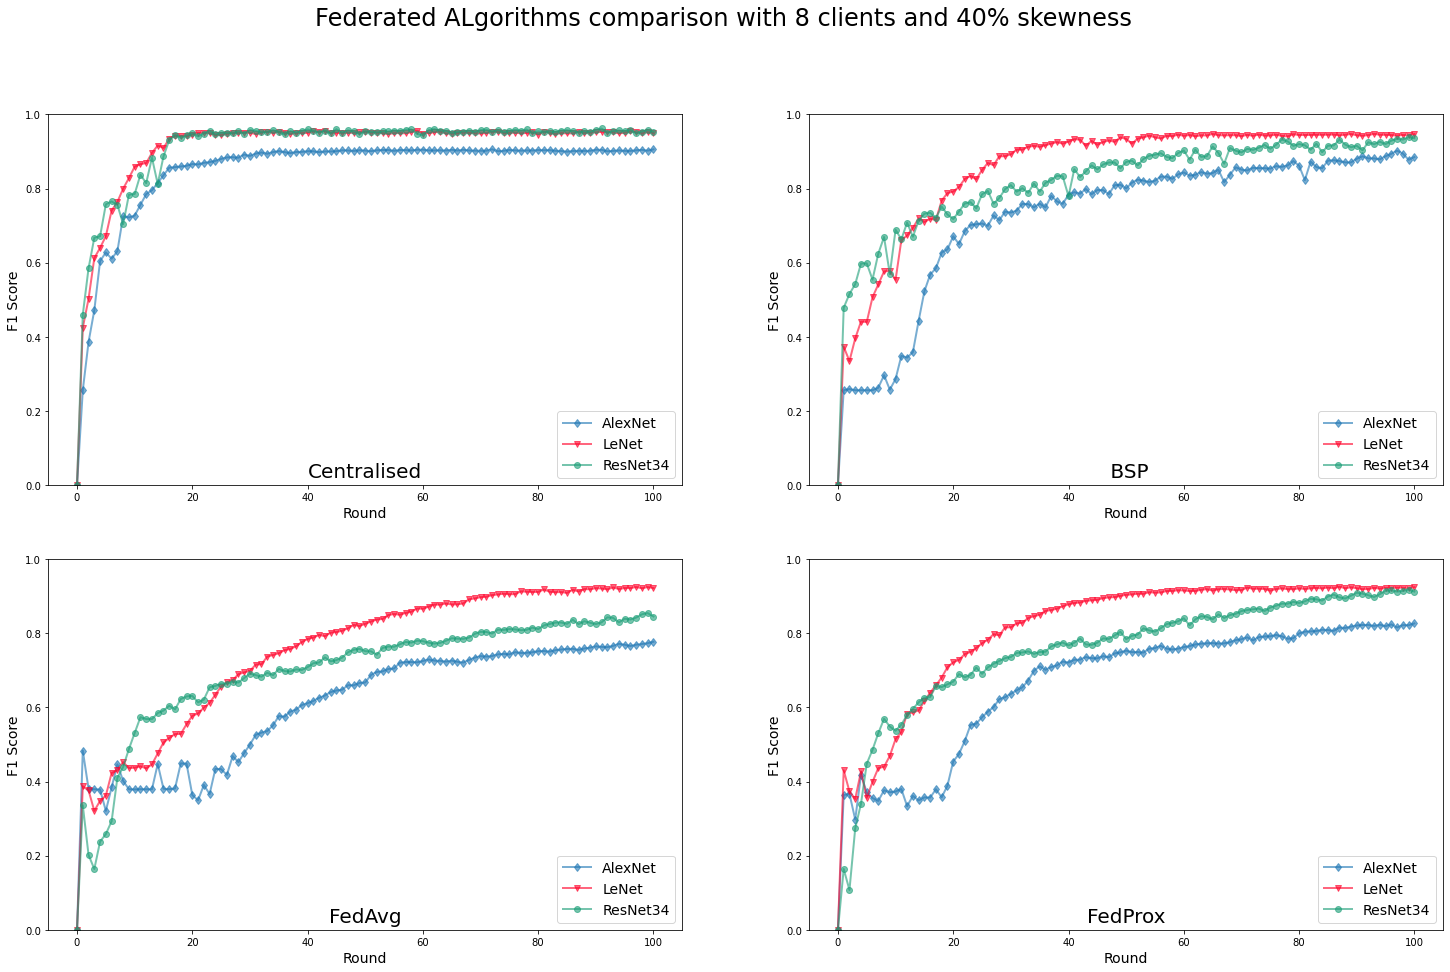

In [102]:
fig, ax = plt.subplots(2, 2, figsize=(25,15))
fig.suptitle("Federated ALgorithms comparison with 8 clients and 40% skewness", fontsize=24)
bsp_results ={"AlexNet" : np.genfromtxt('cfrac_results/BSP_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_22_27.csv',delimiter=',')[2,:],
    "LeNet" : np.genfromtxt('cfrac_results/BSP_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_15_49.csv',delimiter=',')[2,:],
             "ResNet34" : np.genfromtxt('cfrac_results/BSP_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_18_45.csv',delimiter=',')[2,:]
}
fedavg_results = {
                 "AlexNet": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_07_50.csv',delimiter=',')[2,:],
                 "LeNet": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_18_03.csv',delimiter=',')[2,:],
    "ResNet34": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_23_38.csv',delimiter=',')[2,:]
}
fedprox_results = {                 "AlexNet": np.genfromtxt('FedProx_runs/FedProx_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_09_18.csv',delimiter=',')[2,:],  
    "LeNet": np.genfromtxt('FedProx_runs/FedProx_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_03_39.csv',delimiter=',')[2,:],
                 "ResNet34": np.genfromtxt('FedProx_runs/FedProx_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_07_17.csv',delimiter=',')[2,:]}  
centralised_results ={                 "AlexNet": np.genfromtxt('centralised_runs/Centralised_CNN_alexnet_bs_4_epochs_100_01_03_17_42.csv',delimiter=',')[2,:],  
    "LeNet": np.genfromtxt('centralised_runs/Centralised_CNN_lenet_bs_4_epochs_100_01_03_16_11.csv',delimiter=',')[2,:],
                 "ResNet34": np.genfromtxt('centralised_runs/Centralised_CNN_resnet34_bs_4_epochs_100_01_03_17_06.csv',delimiter=',')[2,:]}  
restart_colors()
plot_curves(bsp_results, ax[0][1], ' BSP', 0, 1, "F1 Score")
restart_colors()

plot_curves(fedavg_results, ax[1][0], 'FedAvg', 0, 1, "F1 Score")
restart_colors()

plot_curves(fedprox_results, ax[1][1], 'FedProx', 0, 1, "F1 Score")
restart_colors()

plot_curves(centralised_results, ax[0][0], 'Centralised', 0, 1, "F1 Score")

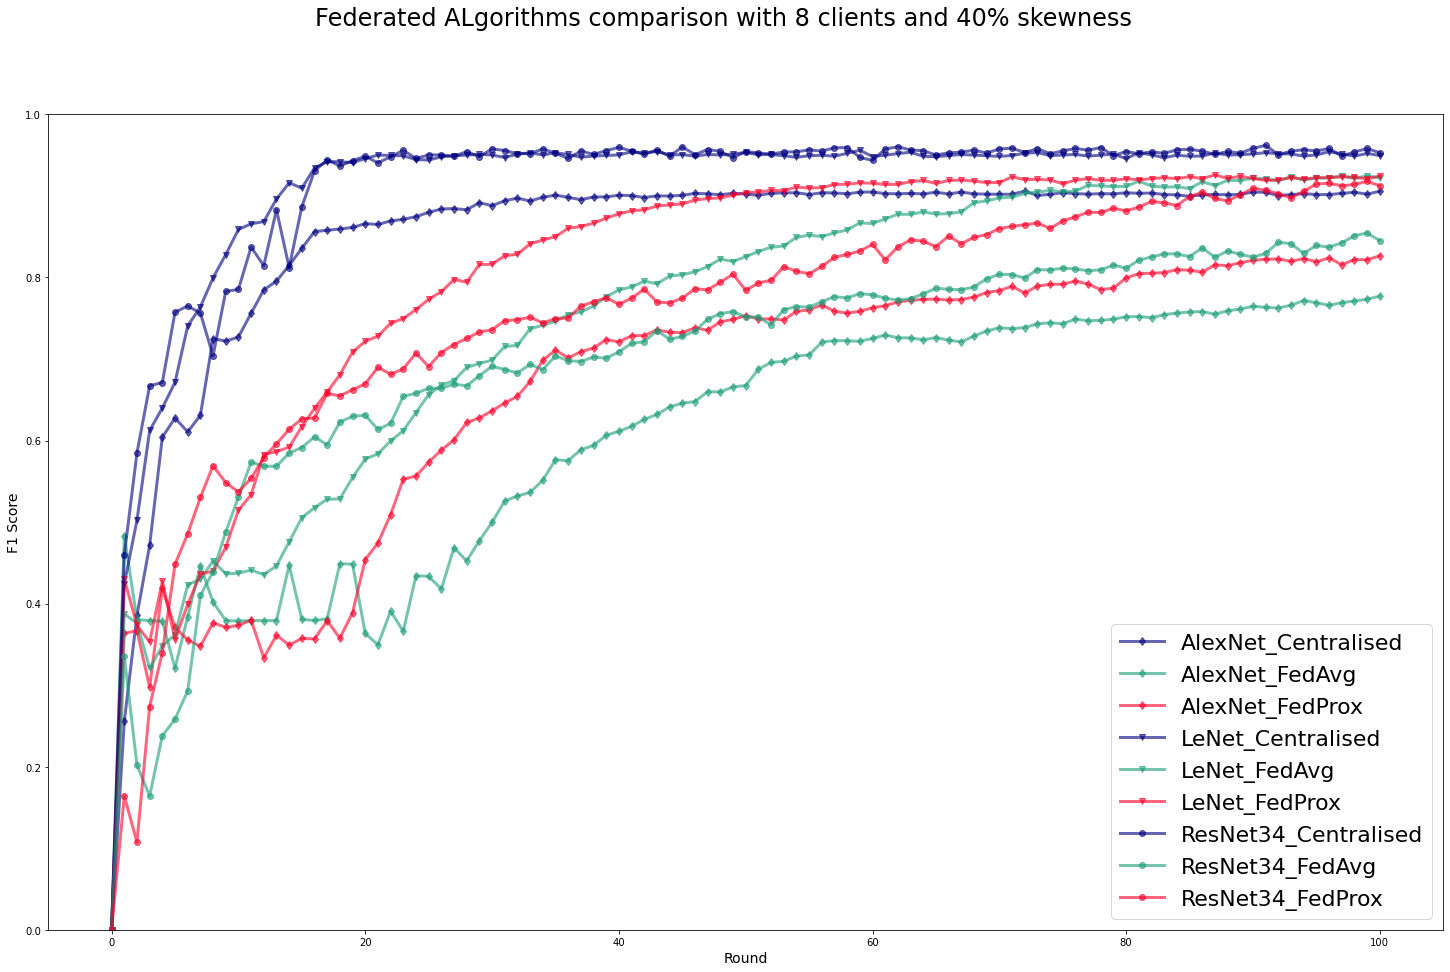

In [104]:
fig, ax = plt.subplots(figsize=(25,15))
fig.suptitle("Federated ALgorithms comparison with 8 clients and 40% skewness", fontsize=24)
results ={
    #"AlexNetBSP" : np.genfromtxt('cfrac_results/BSP_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_22_27.csv',delimiter=',')[2,:],
    #"LeNetBSP" : np.genfromtxt('cfrac_results/BSP_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_15_49.csv',delimiter=',')[2,:],
    #         "ResNet34BSP" : np.genfromtxt('cfrac_results/BSP_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_18_45.csv',delimiter=',')[2,:],
    "AlexNet_Centralised": np.genfromtxt('centralised_runs/Centralised_CNN_alexnet_bs_4_epochs_100_01_03_17_42.csv',delimiter=',')[2,:],  
    "AlexNet_FedAvg": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_07_50.csv',delimiter=',')[2,:],
    "AlexNet_FedProx": np.genfromtxt('FedProx_runs/FedProx_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_09_18.csv',delimiter=',')[2,:],  
    "LeNet_Centralised": np.genfromtxt('centralised_runs/Centralised_CNN_lenet_bs_4_epochs_100_01_03_16_11.csv',delimiter=',')[2,:],
    "LeNet_FedAvg": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_18_03.csv',delimiter=',')[2,:],
    "LeNet_FedProx": np.genfromtxt('FedProx_runs/FedProx_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_03_39.csv',delimiter=',')[2,:],
    "ResNet34_Centralised": np.genfromtxt('centralised_runs/Centralised_CNN_resnet34_bs_4_epochs_100_01_03_17_06.csv',delimiter=',')[2,:],
    "ResNet34_FedAvg": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_23_38.csv',delimiter=',')[2,:],
    "ResNet34_FedProx": np.genfromtxt('FedProx_runs/FedProx_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_07_17.csv',delimiter=',')[2,:],  
    }

restart_colors()
plot_curves(results, ax, ' ', 0, 1, "F1 Score",True,22,3)

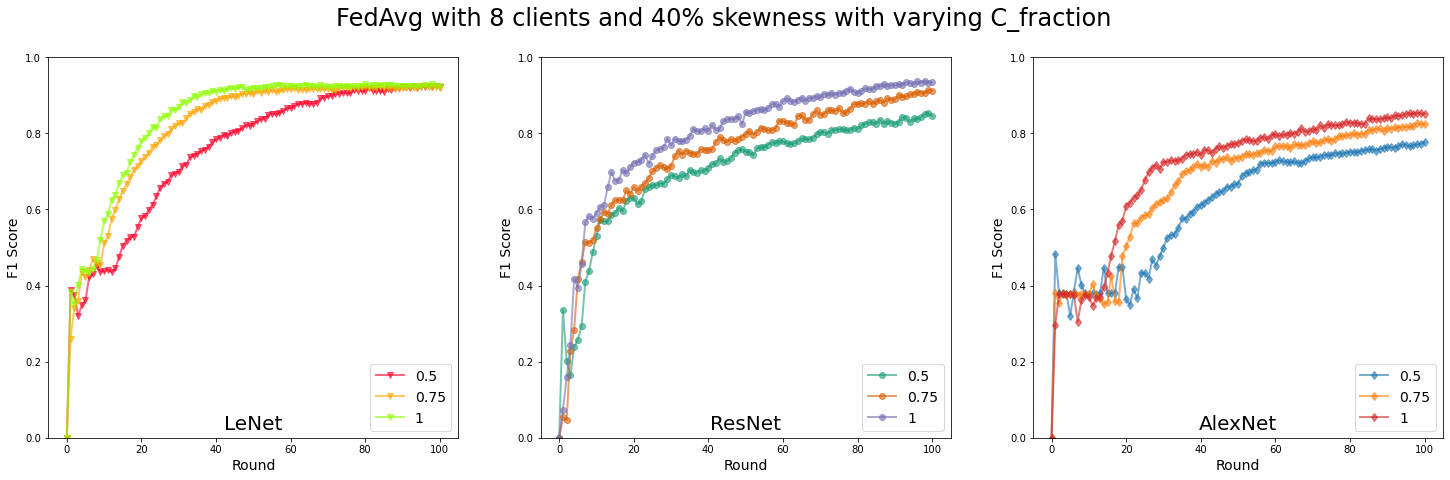

In [105]:
restart_colors()

lenet_cfrac_results = {"0.5": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_18_03.csv',delimiter=',')[2,:],
                 "0.75": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_22_02_19_36.csv',delimiter=',')[2,:],
                 "1": np.genfromtxt('cfrac_results/FedAvg_CNN_lenet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_1.0_bs_4_22_02_21_35.csv',delimiter=',')[2,:]}
resnet_cfrac_results = {"0.5": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_22_02_23_38.csv',delimiter=',')[2,:],
                 "0.75": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_23_02_02_40.csv',delimiter=',')[2,:],
                 "1": np.genfromtxt('cfrac_results/FedAvg_CNN_resnet34_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_1.0_bs_4_23_02_06_39.csv',delimiter=',')[2,:]}
alexnet_cfrac_results = {"0.5": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_07_50.csv',delimiter=',')[2,:],
                 "0.75": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_23_02_09_37.csv',delimiter=',')[2,:],
                 "1": np.genfromtxt('cfrac_results/FedAvg_CNN_alexnet_clients_8_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_1.0_bs_4_23_02_12_02.csv',delimiter=',')[2,:]}    
fig, ax = plt.subplots(1, 3, figsize=(25,7))
fig.suptitle("FedAvg with 8 clients and 40% skewness with varying C_fraction", fontsize=24)
plot_curves(lenet_cfrac_results,ax[0],'LeNet',0.0,1.0,"F1 Score")
plot_curves(resnet_cfrac_results,ax[1],'ResNet',0.0,1.0, "F1 Score")
plot_curves(alexnet_cfrac_results,ax[2],'AlexNet',0.0,1.0, "F1 Score")


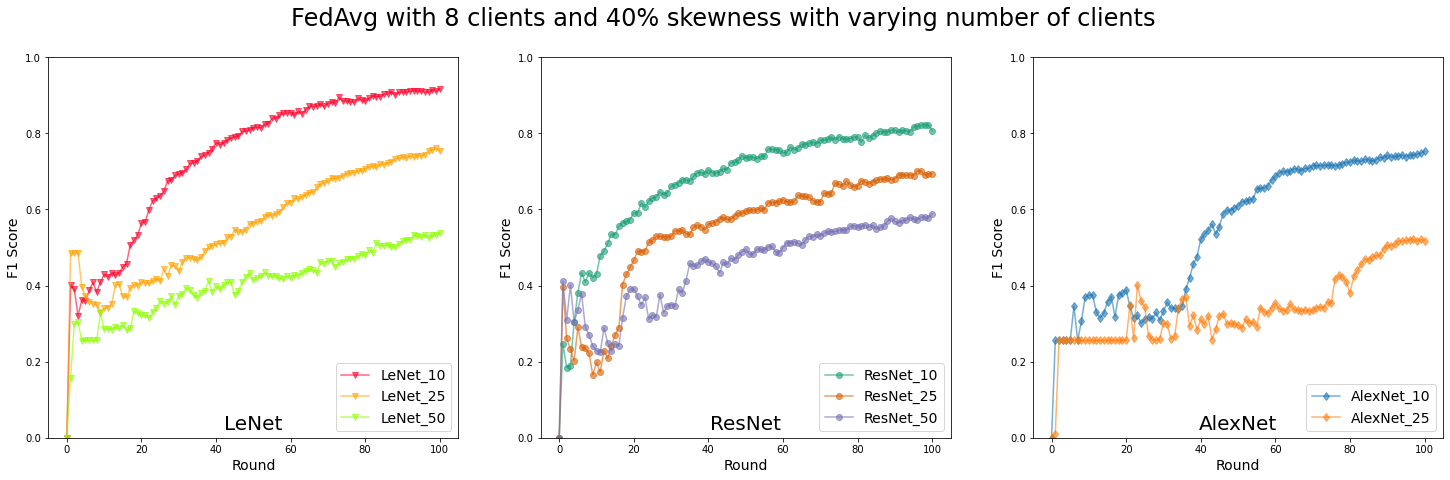

In [99]:
restart_colors()

lenet_clients_results = {"LeNet_10": np.genfromtxt('nclients_results/FedAvg_CNN_lenet_clients_10_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_15_38.csv',delimiter=',')[2,:],
                 "LeNet_25": np.genfromtxt('nclients_results/FedAvg_CNN_lenet_clients_25_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_16_36.csv',delimiter=',')[2,:],
                 "LeNet_50": np.genfromtxt('nclients_results/FedAvg_CNN_lenet_clients_50_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_17_35.csv',delimiter=',')[2,:],}
resnet_clients_results = {"ResNet_10": np.genfromtxt('nclients_results/FedAvg_CNN_resnet34_clients_10_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_19_39.csv',delimiter=',')[2,:],
                 "ResNet_25": np.genfromtxt('nclients_results/FedAvg_CNN_resnet34_clients_25_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_21_42.csv',delimiter=',')[2,:],
                 "ResNet_50": np.genfromtxt('nclients_results/FedAvg_CNN_resnet34_clients_50_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_23_02_23_48.csv',delimiter=',')[2,:],}
alexnet_clients_results = {"AlexNet_10": np.genfromtxt('nclients_results/FedAvg_CNN_alexnet_clients_10_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_24_02_01_00.csv',delimiter=',')[2,:],
                 "AlexNet_25": np.genfromtxt('nclients_results/FedAvg_CNN_alexnet_clients_25_skew_40_smallskew_True_epochs_100_cepochs_5_cfrac_0.5_bs_4_24_02_02_10.csv',delimiter=',')[2,:],
                        }
fig, ax = plt.subplots(1, 3, figsize=(25,7))
fig.suptitle("FedAvg with 8 clients and 40% skewness with varying number of clients", fontsize=24)
plot_curves(lenet_clients_results,ax[0],'LeNet',0.0,1.0,"F1 Score")
plot_curves(resnet_clients_results,ax[1],'ResNet',0.0,1.0, "F1 Score")
plot_curves(alexnet_clients_results,ax[2],'AlexNet',0.0,1.0, "F1 Score")


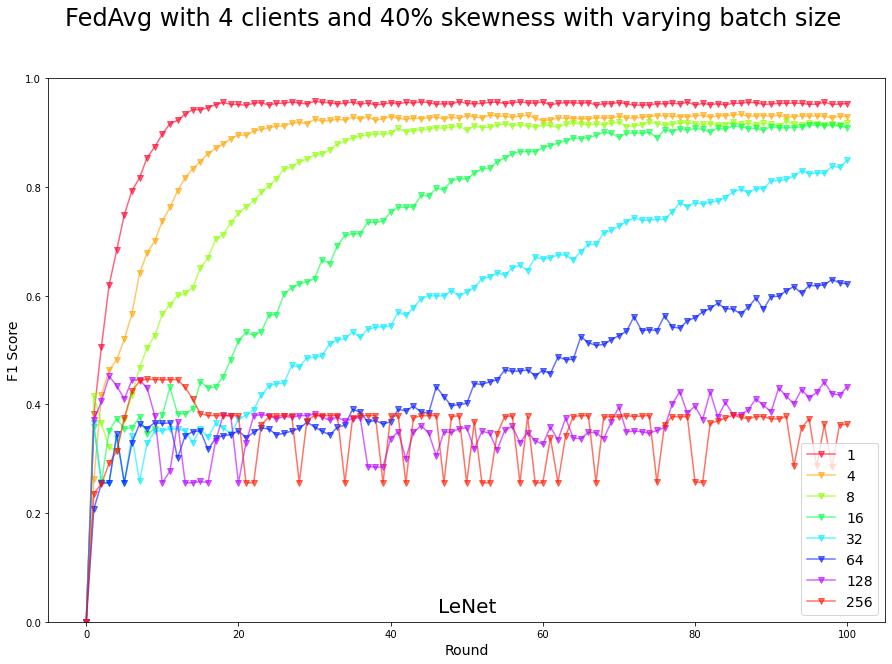

In [85]:
restart_colors()

batch_size_comparision = {"1":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_1_26_02_01_27.csv',delimiter=',')[2,:],
                          "4":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_26_02_15_25.csv',delimiter=',')[2,:],
                          "8":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_8_25_02_23_02.csv',delimiter=',')[2,:],
                          "16":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_16_25_02_21_49.csv',delimiter=',')[2,:],
                          "32":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_32_25_02_20_41.csv',delimiter=',')[2,:],
                          "64":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_64_25_02_19_24.csv',delimiter=',')[2,:],
                          "128":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_128_26_02_12_42.csv',delimiter=',')[2,:],
                          "256":np.genfromtxt('batchsize_results/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_256_26_02_13_50.csv',delimiter=',')[2,:],}

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle("FedAvg with 4 clients and 40% skewness with varying batch size", fontsize=24)

plot_curves(batch_size_comparision,ax,'LeNet',0.0,1.0,"F1 Score")

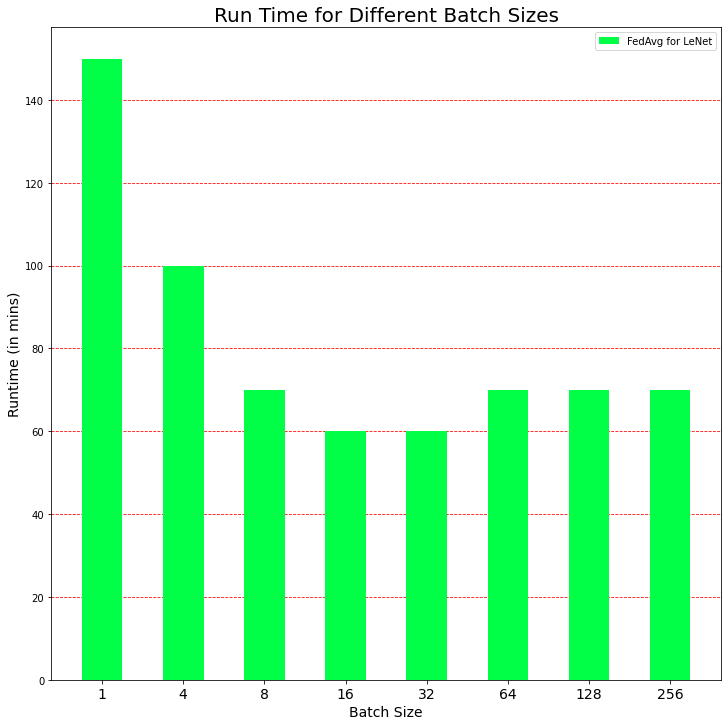

In [158]:
x = np.arange(8)  # the label locations
width = 0.5
#plt.figure(figsize=(10, 8))

fig, ax = plt.subplots(figsize=(12,12))
rects1 = ax.bar(x, [150,100,70,60,60,70,70,70], width, label='FedAvg for LeNet',color=next_color(cm.get_cmap('gist_rainbow'), 3))
ax.set_ylabel('Runtime (in mins)',fontsize=14)
ax.set_title('Run Time for Different Batch Sizes',fontsize=20)
ax.set_xlabel('Batch Size',fontsize=14)
ax.set_xticks(x)
ax.set_axisbelow(True)
ax.grid(axis='y',color='red', linestyle='dashed')
ax.set_xticklabels(["1","4","8","16","32","64","128","256"],fontsize=14)
ax.legend()
_=plt.show()

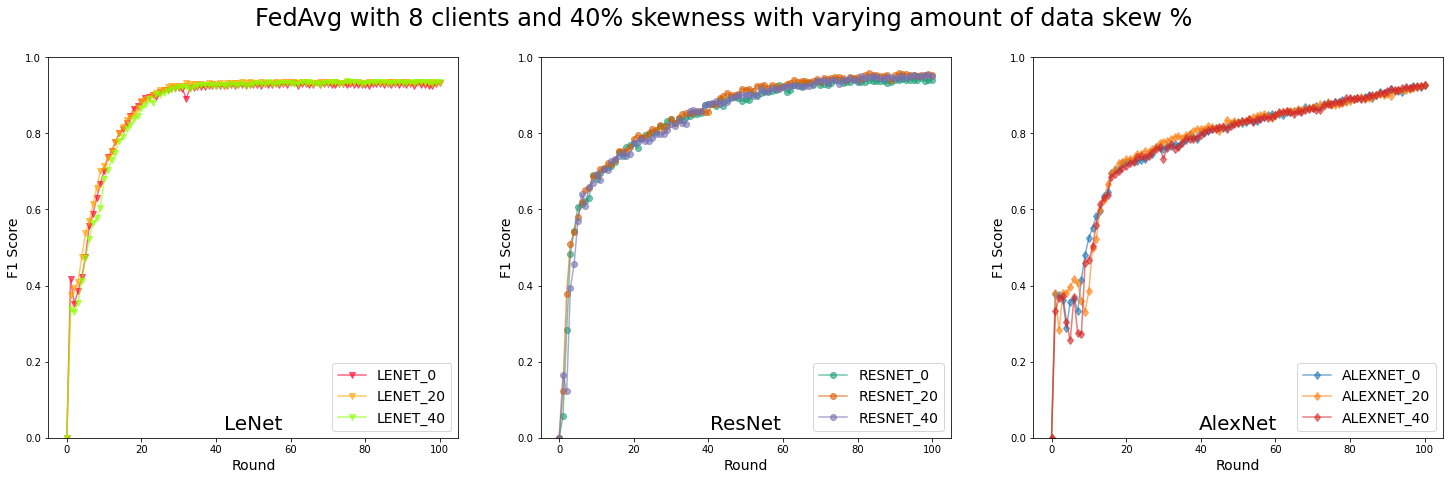

In [100]:
restart_colors()

lenet_skewness_results = {"LENET_0": np.genfromtxt('skewness_runs/FedAvg_CNN_lenet_clients_4_skew_0_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_26_02_22_39.csv',delimiter=',')[2,:],
                 "LENET_20": np.genfromtxt('skewness_runs/FedAvg_CNN_lenet_clients_4_skew_20_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_25_02_17_13.csv',delimiter=',')[2,:],
                 "LENET_40": np.genfromtxt('skewness_runs/FedAvg_CNN_lenet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_23_02_20_11.csv',delimiter=',')[2,:],
                 #"LENET_60": np.genfromtxt('skewness_runs/FedAvg_CNN_lenet_clients_4_skew_60_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_28_02_03_07.csv',delimiter=',')[2,:],
                 #"LENET_80": np.genfromtxt('skewness_runs/FedAvg_CNN_lenet_clients_4_skew_80_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_28_02_04_31.csv',delimiter=',')[2,:],
                         }
resnet_skewness_results = {"RESNET_0": np.genfromtxt('skewness_runs/FedAvg_CNN_resnet34_clients_4_skew_0_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_26_02_21_14.csv',delimiter=',')[2,:],
                 "RESNET_20": np.genfromtxt('skewness_runs/FedAvg_CNN_resnet34_clients_4_skew_20_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_26_02_02_32.csv',delimiter=',')[2,:],
                 "RESNET_40": np.genfromtxt('skewness_runs/FedAvg_CNN_resnet34_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_04_45.csv',delimiter=',')[2,:],
                 #"RESNET_60": np.genfromtxt('skewness_runs/FedAvg_CNN_resnet34_clients_4_skew_60_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_27_02_22_41.csv',delimiter=',')[2,:],
                 #"RESNET_80": np.genfromtxt('skewness_runs/FedAvg_CNN_resnet34_clients_4_skew_80_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_28_02_01_42.csv',delimiter=',')[2,:],
                          }
alexnet_skewness_results = {"ALEXNET_0": np.genfromtxt('skewness_runs/FedAvg_CNN_alexnet_clients_4_skew_0_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_27_02_00_25.csv',delimiter=',')[2,:],
                 "ALEXNET_20": np.genfromtxt('skewness_runs/FedAvg_CNN_alexnet_clients_4_skew_20_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_27_02_02_12.csv',delimiter=',')[2,:],
                "ALEXNET_40": np.genfromtxt('skewness_runs/FedAvg_CNN_alexnet_clients_4_skew_40_smallskew_False_epochs_100_cepochs_5_cfrac_0.75_bs_4_24_02_17_52.csv',delimiter=',')[2,:],
                #"ALEXNET_60": np.genfromtxt('skewness_runs/FedAvg_CNN_alexnet_clients_4_skew_60_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_28_02_06_17.csv',delimiter=',')[2,:],
                #"ALEXNET_80": np.genfromtxt('skewness_runs/FedAvg_CNN_alexnet_clients_4_skew_80_smallskew_True_epochs_100_cepochs_5_cfrac_0.75_bs_4_28_02_08_04.csv',delimiter=',')[2,:],
                        }
fig, ax = plt.subplots(1, 3, figsize=(25,7))
fig.suptitle("FedAvg with 8 clients and 40% skewness with varying amount of data skew %", fontsize=24)
plot_curves(lenet_skewness_results,ax[0],'LeNet',0,1,"F1 Score")
plot_curves(resnet_skewness_results,ax[1],'ResNet',0,1, "F1 Score")
plot_curves(alexnet_skewness_results,ax[2],'AlexNet',0,1, "F1 Score")